<h1>Cidade Maravilhosa: Where to stay and how much to pay?</h1>
<p>In this notebook, all the necessary process to retrieve the data from the datasets, understand it, prepare it and analize it will be made. Our aim, is to use the that to answer the question raised in the blogpost and in the README file. </p>

<h2>Libraries Import</h2>

In [1]:
# Importing libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Data Reading</h3>

In [2]:
# Importing the datasets to be used
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')
df_calendar = pd.read_csv('calendar.csv')
df_neighbourhoods = pd.read_csv('neighbourhoods.csv')

<h3>Listings</h3>
<p>From the listings dataset we can get the information about the listings and hosts, including the id, detailed description, review, status and location.</p>

In [3]:
# Head of lisitngs dataframe
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,783493769216852616,https://www.airbnb.com/rooms/783493769216852616,20221229002515,2022-12-29,city scrape,"Leme, Brasil",Apartamento aconchegante próximo à praia do Le...,NaN,https://a0.muscache.com/pictures/fe1f4b1b-a300...,491704706,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
1,703973293620197060,https://www.airbnb.com/rooms/703973293620197060,20221229002515,2022-12-29,city scrape,Suíte com entrada independente em casarão 1,"Casa ampla, em excelente localização, situada ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,20362236,...,5.00,4.00,5.00,NaN,t,4,0,4,0,0.26
2,782895997622988215,https://www.airbnb.com/rooms/782895997622988215,20221229002515,2022-12-29,city scrape,Apartamento próximo ao metrô,Sua família vai estar perto de tudo ao ficar n...,NaN,https://a0.muscache.com/pictures/d48a6798-d1c8...,302417043,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,23768085,https://www.airbnb.com/rooms/23768085,20221229002515,2022-12-29,city scrape,Vamos a praia,"Ótimo apartamento para duas pessoas, de frente...","Localização: praia da Barra da Tijuca, Posto 2...",https://a0.muscache.com/pictures/e43b686c-c4b4...,86611015,...,4.88,4.98,4.78,NaN,t,1,1,0,0,1.59
4,10463735,https://www.airbnb.com/rooms/10463735,20221229002515,2022-12-29,city scrape,Sobrado aconchegante e espaçoso,"Sobrado amplo, arejado, com arquitetura inusit...",Laranjeiras é um bairro histórico do Rio de Ja...,https://a0.muscache.com/pictures/52ffaa78-2e94...,53918534,...,1.00,2.00,1.00,NaN,t,6,2,4,0,0.03


In [4]:
# Looking for the quantity of healthy data
no_nulls_listings = len(set(df_listings.columns[df_listings.isnull().mean()<0.25]))
print("The listings datafile contains {} rows and {} columns. The number of columns with at least 75% of healthy data in this dataset is {}.".format(df_listings.shape[0],df_listings.shape[1],no_nulls_listings))

The listings datafile contains 28301 rows and 75 columns. The number of columns with at least 75% of healthy data in this dataset is 57.


<h3>Reviews</h3>
<p>From the review dataset we can get the info about given reviews for a listing, including comments, date, and reviewers data.</p>

In [5]:
# Head of reviews dataframe
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r<b...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


In [6]:
# Looking for the quantity of healthy data
no_nulls_reviews = len(set(df_reviews.columns[df_reviews.isnull().mean()<0.25]))
print("The reviews datafile contains {} rows and {} columns. The number of columns with at least 75% of healthy data in this dataset is {}.".format(df_reviews.shape[0],df_reviews.shape[1],no_nulls_reviews))

The reviews datafile contains 495336 rows and 6 columns. The number of columns with at least 75% of healthy data in this dataset is 6.


<h3>Calendar</h3>
<p>From the calendar dataset we can get the info about listings avaiblable dates, price, and minimum and maximum number of nights for booking.</p>

In [7]:
# Head of calendar dataframe
df_calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,17878,2022-12-30,f,"$1,600.00","$1,600.00",5.0,28.0
1,17878,2022-12-31,f,"$1,600.00","$1,600.00",5.0,28.0
2,17878,2023-01-01,f,"$1,600.00","$1,600.00",5.0,28.0
3,17878,2023-01-02,t,"$1,200.00","$1,200.00",5.0,28.0
4,17878,2023-01-03,f,"$1,200.00","$1,200.00",5.0,28.0


In [8]:
# Looking for the quantity of healthy data
no_nulls_calendar = len(set(df_calendar.columns[df_calendar.isnull().mean()<0.25]))
print("The calendar datafile contains {} rows and {} columns. The number of columns with at least 75% of healthy data in this dataset is {}.".format(df_calendar.shape[0],df_calendar.shape[1],no_nulls_calendar))

The calendar datafile contains 10329872 rows and 7 columns. The number of columns with at least 75% of healthy data in this dataset is 7.


<h3>Neighbourhoods</h3>
<p>From the Neighbourhoods dataset we can get the list of neighborhoods in Rio.</p>

In [9]:
# Head of neighbourhood dataframe
df_neighbourhoods.head(5)

,neighbourhood_group,neighbourhood
0,NaN,Abolição
1,NaN,Acari
2,NaN,Água Santa
3,NaN,Alto da Boa Vista
4,NaN,Anchieta


In [10]:
# Looking for the quantity of healthy data
no_nulls_neighbourhoods = len(set(df_neighbourhoods.columns[df_neighbourhoods.isnull().mean()<0.25]))
print("The neighbourhoods datafile contains {} rows and {} columns. The number of columns with at least 75% of healthy data in this dataset is {}.".format(df_neighbourhoods.shape[0],df_neighbourhoods.shape[1],no_nulls_neighbourhoods))

The neighbourhoods datafile contains 160 rows and 2 columns. The number of columns with at least 75% of healthy data in this dataset is 1.


<h2>Cleaning</h2>
<p>We are specially interested in the prices and reviews of the listings. Beacause of that we will drop every row that do not contain any of these information.</p>

In [11]:
df_listings_cleaned = df_listings.copy().dropna(axis=0,subset=['price','review_scores_value'])
# Looking for the quantity of healthy data
no_nulls_listings = len(set(df_listings_cleaned.columns[df_listings_cleaned.isnull().mean()<0.25]))
print("The listings datafile contains {} rows and {} columns. The number of columns with at least 75% of healthy data in this dataset is {}.".format(df_listings_cleaned.shape[0],df_listings_cleaned.shape[1],no_nulls_listings))

The listings datafile contains 19601 rows and 75 columns. The number of columns with at least 75% of healthy data in this dataset is 67.


In [12]:
df_calendar_cleaned = df_calendar.copy().dropna(axis=0,subset=['price'])
# Looking for the quantity of healthy data
no_nulls_listings = len(set(df_calendar_cleaned.columns[df_calendar_cleaned.isnull().mean()<0.25]))
print("The listings datafile contains {} rows and {} columns. The number of columns with at least 75% of healthy data in this dataset is {}.".format(df_calendar_cleaned.shape[0],df_calendar_cleaned.shape[1],no_nulls_listings))

The listings datafile contains 10329288 rows and 7 columns. The number of columns with at least 75% of healthy data in this dataset is 7.


<h2>Data Understanting and Analisys</h2>

<h3>Part I - In what neighbourhood to stay in Rio?</h3>
<p>In the following cells, we expect to answer the question above by finding the neighbourhoods with the most listings.</p>

<p>At first, let's take a look at the number of unique neighborhoods in the listings after cleaning.</p>

In [13]:
# Looking for the number of listed neoghbourhoods
listings_neighbourhoods = set([ x for x in df_listings_cleaned['neighbourhood_cleansed'].unique()])
print("There are {} unique neighbourhoods in the listings. {}% of the neighbourhoods of Rio de Janeiro".format(len(listings_neighbourhoods),100*len(listings_neighbourhoods)/df_neighbourhoods.shape[0]))

There are 137 unique neighbourhoods in the listings. 85.625% of the neighbourhoods of Rio de Janeiro


<p>Let us see the 20 neighbours with more listings.</p>

In [14]:
# Looking for the number of listings for each neighbourhood
df_listings_neighbourhoods = df_listings_cleaned.groupby(['neighbourhood_cleansed']).count()
df_listings_neighbourhoods.sort_values(by='id',ascending=False)['id'].head(20)

neighbourhood_cleansed
Copacabana                  6273
Ipanema                     2147
Barra da Tijuca             1941
Leblon                      1044
Jacarepaguá                 1001
Botafogo                     922
Recreio dos Bandeirantes     883
Santa Teresa                 672
Centro                       548
Flamengo                     449
Leme                         376
Laranjeiras                  260
Tijuca                       225
Camorim                      207
Glória                       159
Catete                       154
Lagoa                        135
Gávea                        127
Jardim Botânico              120
Humaitá                      104
Name: id, dtype: int64

<p>For these neighbourhoods, let us see the review scores.</p>

In [15]:
# Finding the mean review score by neighbourhood
df_listings_reviews = df_listings_cleaned.groupby(['neighbourhood_cleansed']).mean()
df_listings_reviews = df_listings_reviews[df_listings_reviews.index.isin(df_listings_neighbourhoods.sort_values(by='id',ascending=False)['id'].head(20).index)]
df_listings_reviews.sort_values(by='review_scores_value',ascending=False)['review_scores_value']

neighbourhood_cleansed
Laranjeiras                 4.767000
Humaitá                     4.750096
Tijuca                      4.748489
Gávea                       4.746693
Flamengo                    4.734120
Santa Teresa                4.733839
Leme                        4.726117
Centro                      4.720584
Catete                      4.710779
Lagoa                       4.707556
Glória                      4.697547
Copacabana                  4.695329
Recreio dos Bandeirantes    4.692492
Botafogo                    4.685499
Jardim Botânico             4.683417
Jacarepaguá                 4.670450
Barra da Tijuca             4.659088
Ipanema                     4.658687
Leblon                      4.642864
Camorim                     4.604058
Name: review_scores_value, dtype: float64

<p>Now let's format the price column, remove some outliers and see the mean of the remaining data. To do that, we will remove data under Q1 - 1.5*IQR and above Q3 + 1.5*IQR.</p>

In [16]:
# Filtering outlier prices by the quartiles
df_listings_prices = df_listings_cleaned.copy()
df_listings_prices['price'] = [float(str(x).replace('$',"").replace(',',"")) for x in df_listings_prices['price']]
df_listing_prices_q1 = df_listings_prices.groupby(by='neighbourhood_cleansed').quantile(0.25)['price']
df_listing_prices_q3 = df_listings_prices.groupby(by='neighbourhood_cleansed').quantile(0.75)['price']

C:\Users\mathe\AppData\Local\Temp\ipykernel_32696\829986438.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_listing_prices_q1 = df_listings_prices.groupby(by='neighbourhood_cleansed').quantile(0.25)['price']
C:\Users\mathe\AppData\Local\Temp\ipykernel_32696\829986438.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_listing_prices_q3 = df_listings_prices.groupby(by='neighbourhood_cleansed').quantile(0.75)['price']


In [17]:
df_listings_prices = df_listings_prices[df_listings_prices['neighbourhood_cleansed'].isin(df_listings_neighbourhoods.sort_values(by='id',ascending=False)['id'].head(20).index)]

In [18]:
df_listings_prices['q1'] = [df_listing_prices_q1[x] for x in df_listings_prices['neighbourhood_cleansed']]
df_listings_prices['q3'] = [df_listing_prices_q3[x] for x in df_listings_prices['neighbourhood_cleansed']]

In [19]:
df_listings_prices = df_listings_prices[(df_listings_prices['price'] > df_listings_prices['q1'] - 1.5*(df_listings_prices['q3']-df_listings_prices['q1'])) & (df_listings_prices['price'] < df_listings_prices['q3'] + 1.5*(df_listings_prices['q3']-df_listings_prices['q1']))]

In [20]:
df_listings_prices = df_listings_prices.groupby(by='neighbourhood_cleansed').mean().sort_values(by='price',ascending=False)

<p>To find our final results, let's remove some neighbouhoods that are too far from touristic areas.</p>

In [21]:
# Removing neighbourhoods we are not interested in
far_neighborhoods = ['Recreio dos Bandeirantes','Jacarepaguá','Camorim','Taquara','Barra de Guaratiba','Itanhangá']
df_listings_neighbourhoods = df_listings_neighbourhoods[~df_listings_neighbourhoods.index.isin(far_neighborhoods)]
df_listings_reviews = df_listings_reviews[~df_listings_reviews.index.isin(far_neighborhoods)]
df_listings_prices = df_listings_prices[~df_listings_prices.index.isin(far_neighborhoods)]

<p>After that, we can get the final results.</p>

In [22]:
# Creating final dataframe
df_places = pd.concat([pd.DataFrame(df_listings_neighbourhoods['id'],columns=['id']),pd.DataFrame(df_listings_reviews['review_scores_value'],columns=['review_scores_value']),pd.DataFrame(df_listings_prices['price'],columns=['price'])],axis=1)

In [23]:
# Sorting data by id counting.
df_places.sort_values(by='id',ascending=False).head(10)

,id,review_scores_value,price
neighbourhood_cleansed,,,
Copacabana,6273,4.695329,656.882822
Ipanema,2147,4.658687,988.982741
Barra da Tijuca,1941,4.659088,743.739612
Leblon,1044,4.642864,1075.767442
Botafogo,922,4.685499,425.664384
Santa Teresa,672,4.733839,313.671053
Centro,548,4.720584,290.615234
Flamengo,449,4.734120,388.552381
Leme,376,4.726117,622.799419


<p>We can see in the table the top ten neighbourhoods with most listings, that will be our recomendations of places to stay in Rio. We also show the prices and review's score, data that will show us some information about these places. With this results our first question is answered.</p>

<h2>Part II - What price we expected to pay in these places during the main events in the city?</h2>
<p>For the second question we want to find the average plice someno will pay at each location during Carnival and New Year's Eve.</p>

<p>Now, let us take a look at the price evolution during New Year's Eve and Carnival these places.</p>

In [24]:
# Getting the name of the top 10 neighbourhoods. 
list_top_neighbourhoods = list(df_places.sort_values(by='id',ascending=False).head(10).index)

In [25]:
# Filtering to get the data from the listings dataframe for the top 10 neighborhoods.
df_top_neighbours = df_listings_cleaned.copy()[df_listings_cleaned['neighbourhood_cleansed'].isin(list_top_neighbourhoods)]

In [26]:
# Creating a dataframe with only the ID and neighbourhood from the listing registry.
df_top_neighbours = df_top_neighbours[['id','neighbourhood_cleansed']]

In [27]:
# Find unique listings id.
listings_in_top_neighbourhoods = pd.unique(df_top_neighbours['id'])

In [28]:
# Filter calendar dataframe for top neighbourhoods.
df_calendar_top_listings = df_calendar_cleaned.copy()[df_calendar_cleaned['listing_id'].isin(listings_in_top_neighbourhoods)]

In [29]:
# Inserting neighbourhoods for the listings
df_calendar_top_listings['neighbourhood'] = [df_top_neighbours[df_top_neighbours['id'] == x]['neighbourhood_cleansed'].values[0] for x in df_calendar_top_listings['listing_id']]

In [30]:
# Treating price column
df_calendar_top_listings['price'] = [float(str(x).replace('$',"").replace(',',"")) for x in df_calendar_top_listings['price']]

In [31]:
newyear_dates = ['2022-12-30','2023-01-07']
carnival_dates = ['2023-02-16','2023-02-23']

In [32]:
# Filtering date
df_calendar_top_newyear = df_calendar_top_listings.copy()[df_calendar_top_listings['date'].between(newyear_dates[0],newyear_dates[1])]

In [33]:
df_calendar_top_carnival = df_calendar_top_listings.copy()[df_calendar_top_listings['date'].between(carnival_dates[0],carnival_dates[1])]

In [34]:
# Grouping by neighbourhood
df_calendar_neighbourhoods_newyear = df_calendar_top_newyear.groupby(by=['neighbourhood']).mean()
df_calendar_neighbourhoods_carnival = df_calendar_top_carnival.groupby(by=['neighbourhood']).mean()

In [35]:
# Average price for a daily stay in the 10 neighbourhoods with more listenings during New Year's Eve.
df_calendar_neighbourhoods_newyear.head(10)

,listing_id,price,minimum_nights,maximum_nights
neighbourhood,,,,
Barra da Tijuca,1.772320e+17,1265.695403,4.151239,726.044078
Botafogo,1.462950e+17,574.609665,4.452037,696.042781
Centro,1.521775e+17,475.649838,4.400243,747.320965
Copacabana,1.452488e+17,1145.889828,4.297353,673.579028
Flamengo,1.309750e+17,1235.165801,6.352141,716.244246
Ipanema,1.481530e+17,1726.965016,3.914506,667.446204
Laranjeiras,1.539857e+17,1783.028205,3.756838,618.841880
Leblon,1.540962e+17,1125.023011,4.352509,656.654309
Leme,1.606045e+17,1369.190603,4.398050,685.977246


In [36]:
# Average price for a daily stay in the 10 neighbourhoods with more listenings during Carnival.
df_calendar_neighbourhoods_carnival.head(10)

,listing_id,price,minimum_nights,maximum_nights
neighbourhood,,,,
Barra da Tijuca,1.772320e+17,1202.923107,4.351880,721.397089
Botafogo,1.462950e+17,561.714479,4.603172,692.819279
Centro,1.521775e+17,764.779653,4.647810,749.531706
Copacabana,1.452488e+17,1665.810786,4.665856,678.090541
Flamengo,1.309750e+17,996.283686,6.277561,721.952394
Ipanema,1.481530e+17,1843.191372,4.215068,667.252678
Laranjeiras,1.539857e+17,879.035577,3.672596,619.916827
Leblon,1.540962e+17,1629.068073,4.709492,656.986817
Leme,1.606045e+17,1140.592420,4.475066,686.691822


<p>Comparing these two tables with the one made for the first question, we can see that the prices have a significantilly increase during these events. We now can answer how much someone will expect pay to stay in these places during the main events of the year in Rio de Janeiro.</p>

<h2>Part III - What time of the year to come paying better prices?</h2>
<p>We want to find the prices trending during the following year to find the time of the year someno can get better prices to stay in the best places.</p>

<p>Now, let us take a look at the price evolution for the year of 2023 for these place.</p>

In [37]:
# Grouping by date and neighbourhood
df_calendar_neighbourhoods_and_date = df_calendar_top_listings.copy().groupby(by=['date','neighbourhood']).mean()

In [38]:
df_calendar_neighbourhoods_and_date = df_calendar_neighbourhoods_and_date['price']

In [39]:
df_calendar_neighbourhoods_and_date = df_calendar_neighbourhoods_and_date.unstack(level = 'neighbourhood')

In [43]:
def plot_price_trend(df):
    '''
    This function plot the price trend from a dataframe. The plot is formatted with labels, legends and specific size.
    
    input: df -> Unstacked gropby dataframe with the columns date and neighbourhoods names.
    
    output: line plot of the price by neighbourhood trend along dates.
    
    '''
    fig, ax = plt.subplots(figsize=(10, 4.5))

    df.plot(ax=ax)

    ax.set_xlabel('Date')
    ax.set_ylabel('Price [R$]')

    ax.legend(ax.get_lines(), df.columns, loc='best', ncol=2)
    
    plt.tight_layout()
    
    return 

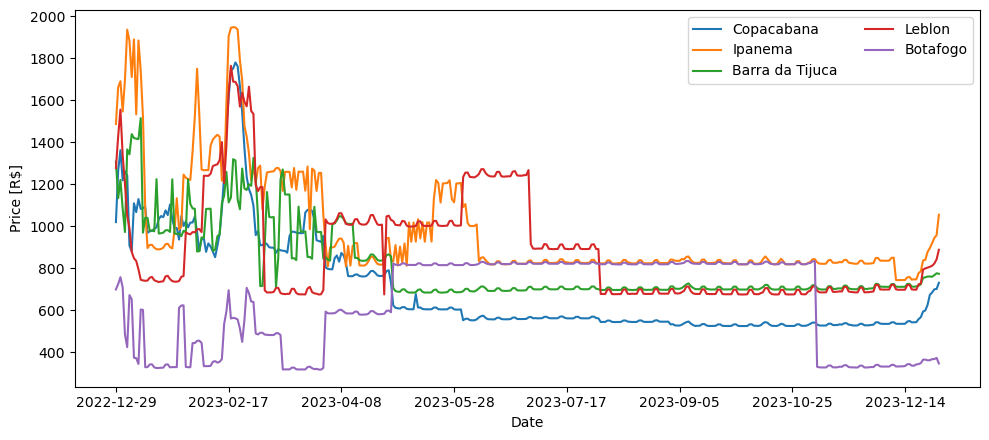

In [44]:
# Plotting first 5 places of interest prices trend
df_calendar_neighbourhoods_and_date_1 = df_calendar_neighbourhoods_and_date[list_top_neighbourhoods[:5]]
plot_price_trend(df_calendar_neighbourhoods_and_date_1)

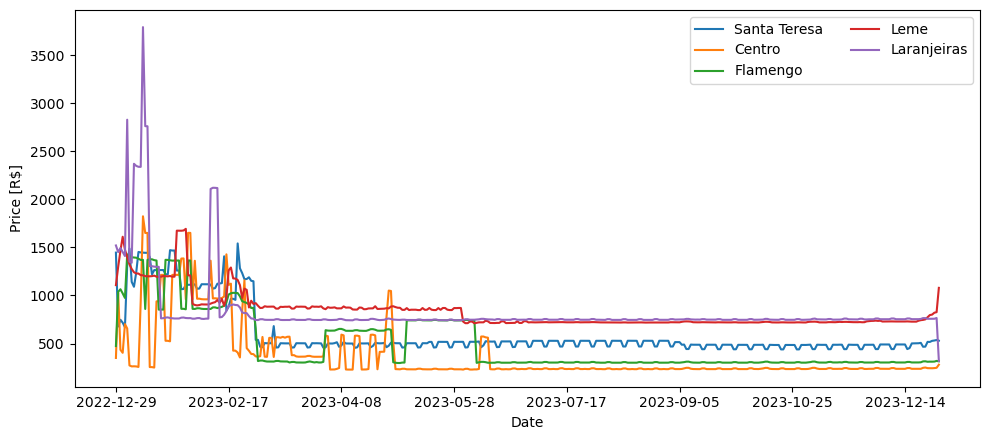

In [45]:
# Plotting second 5 places of interest prices trend
df_calendar_neighbourhoods_and_date_2 = df_calendar_neighbourhoods_and_date[list_top_neighbourhoods[5:]]
plot_price_trend(df_calendar_neighbourhoods_and_date_2)

<p>From the prices trend plotted above, we can see that in fact the prices are higher during New Year's Eve (close to 31 of December) and Carnival (16 of February to 23 of February). We can see that after these events the prices drop and from the end of July to the beggining of November, the prices are very stable and signifcantilly lower in every neighborhood.</p>

<h2>Conclusion</h2>
<p>After or brief analisys, we could find the answers to our questions. We found the neighbourhoods with most of the listings,the prices and review scores for these locations and the prices trend during the year.</p>